In [1]:
import os
import shutil
import sys

import numpy as np
from scipy import sparse

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn
sn.set()

import pandas as pd

In [2]:
def get_count(tp, id):
    playcount_groupbyid = tp[[id]].groupby(id, as_index=False)
    count = playcount_groupbyid.size()
    return count['size']

In [3]:
def filter_triplets(tp, min_uc=50, min_sc=0):
    # Only keep the triplets for items which were clicked on by at least min_sc users. 
    if min_sc > 0:
        itemcount = get_count(tp, 'movieId')
        tp = tp[tp['movieId'].isin(itemcount.index[itemcount >= min_sc])]
    
    # Only keep the triplets for users who clicked on at least min_uc items
    # After doing this, some of the items will have less than min_uc users, but should only be a small proportion
    if min_uc > 0:
        usercount = get_count(tp, 'userId')
        #print(usercount)
        tp = tp[tp['userId'].isin(usercount.index[usercount >= min_uc])]
    
    # Update both usercount and itemcount after filtering
    usercount, itemcount = get_count(tp, 'userId'), get_count(tp, 'movieId') 
    return tp, usercount, itemcount

In [4]:
raw_data = pd.read_csv('ratings.csv')
raw_data = raw_data[raw_data['rating'] > 3.5]

In [5]:
itemcount = get_count(raw_data, 'movieId')
usercount = get_count(raw_data, 'userId')
usercount.head() >= 40

0     True
1     True
2     True
3    False
4     True
Name: size, dtype: bool

20720
109980


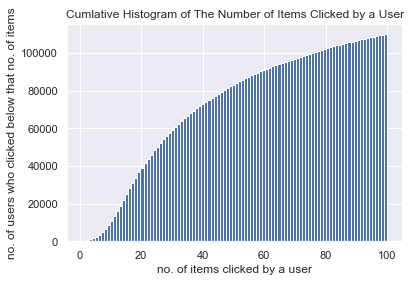

In [6]:
usercount = usercount[usercount<=100]
plt.hist(usercount, bins=100, cumulative=True);
plt.xlabel("no. of items clicked by a user")
plt.ylabel("no. of users who clicked below that no. of items")
plt.title("Cumlative Histogram of The Number of Items Clicked by a User")
print(itemcount.shape[0])
print(usercount.shape[0])

In [7]:
raw_data_, user_activity, item_popularity = filter_triplets(raw_data)
sparsity = 1. * raw_data_.shape[0] / (user_activity.shape[0] * item_popularity.shape[0])

print("After filtering, there are %d watching events from %d users and %d movies (sparsity: %.3f%%)" % 
      (raw_data_.shape[0], user_activity.shape[0], item_popularity.shape[0], sparsity * 100))

After filtering, there are 4054046 watching events from 55918 users and 17245 movies (sparsity: 0.420%)


raw_data, user_activity, item_popularity = filter_triplets(raw_data,20,0)
After filtering, there are 7337030 watching events from 101597 users and 19415 movies (sparsity: 0.372%)

raw_data, user_activity, item_popularity = filter_triplets(raw_data,5,0)
After filtering, there are 9857803 watching events from 136477 users and 20649 movies (sparsity: 0.350%)

raw_data, user_activity, item_popularity = filter_triplets(raw_data,0,0)
After filtering, there are 9995410 watching events from 138287 users and 20720 movies (sparsity: 0.349%)

raw_data_, user_activity, item_popularity = filter_triplets(raw_data,40,0)
After filtering, there are 4810906 watching events from 66450 users and 18020 movies (sparsity: 0.402%)

raw_data_, user_activity, item_popularity = filter_triplets(raw_data,40,0)
After filtering, there are 4810906 watching events from 66450 users and 18020 movies (sparsity: 0.420%)